In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import h5py
import os
import random

In [8]:
.DATASET_DIR = "gestures"
CLASS_DIR = {
    "zero": "zero",
    "one": "one",
    "two": "two",
    "three": "three",
    "four": "four",
    "five": "five"}
CLASS_MAP = {
    "zero": 0,
    "one": 1,
    "two": 2,
    "three": 3,
    "four" : 4,
    "five" : 5
}  


gestures/zero 0
347.png


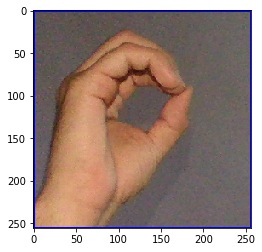

754.png


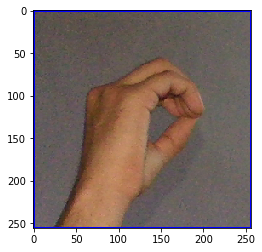

gestures/one 1
347.png


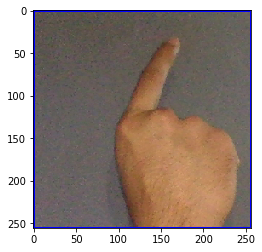

754.png


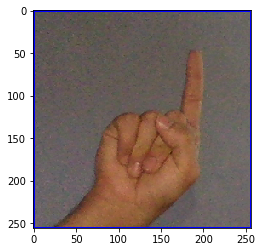

gestures/two 2
460_.png


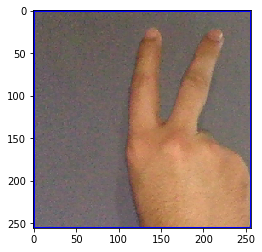

347.png


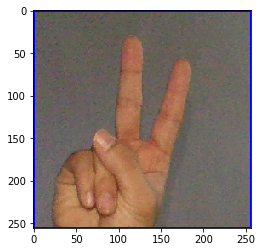

gestures/three 3
460_.png


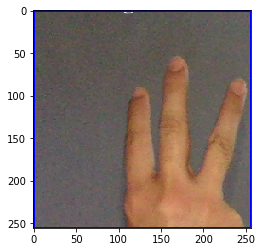

347.png


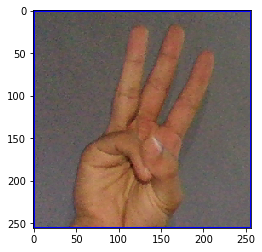

gestures/four 4
460_.png


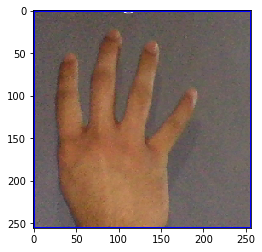

347.png


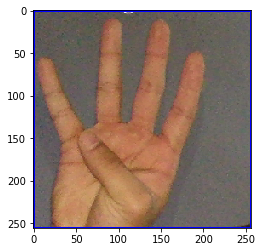

gestures/five 5
460_.png


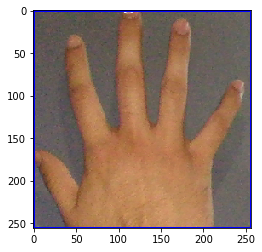

347.png


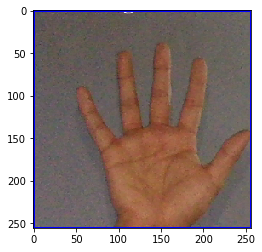

In [31]:
for classes in CLASS_DIR:
    path = os.path.join(DATASET_DIR, CLASS_DIR[classes])
    lab = CLASS_MAP[classes] 
    print(path, lab)
    for img in os.listdir(path)[:2]:
        print(img)
        img_arr = cv2.imread(os.path.join(path,img))
        img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
        plt.imshow(img_arr)
        plt.show()
        
    

(64, 64, 3)


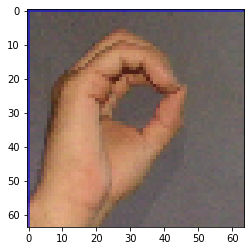

In [10]:

size = 64

img_new = cv2.resize(img_arr, (size, size))
plt.imshow(img_new)
print(img_new.shape)


In [11]:
training_data = []
size = 64
def create_training_data():
    for classes in CLASS_DIR:
        path = os.path.join(DATASET_DIR, CLASS_DIR[classes])
        labels = CLASS_MAP[classes]
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img))
                img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                img_new = cv2.resize(img_arr, (size, size))
                training_data.append([img_new, labels])
            
            except Exception as e:
                print(e)
      
            

In [12]:
create_training_data()

In [13]:
print(len(training_data))

6144


In [14]:
random.shuffle(training_data)
X_train = []
Y_train = []

In [15]:
for features, labels in training_data:
    X_train.append(features)
    Y_train.append(labels)

In [16]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [17]:
X_train.shape

(6144, 64, 64, 3)

In [19]:
Y_train.shape

(1, 6144)

[5]


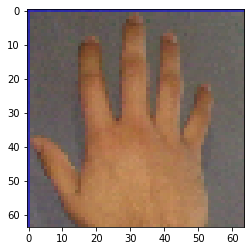

In [23]:
plt.imshow(X_train[76])
print(Y_train[:,76])

In [24]:
with h5py.File('dataset.h5', 'w') as hdf:
    hdf.create_dataset('train_set_X', data = X_train)
    hdf.create_dataset('train_set_Y', data = Y_train)

In [29]:

with h5py.File('dataset.h5', 'r') as f:
    m = f['train_set_Y'][:,0:2]
    print(m.shape)

(1, 2)
